<a href="https://colab.research.google.com/github/nyksrox/NIKHILR/blob/master/FeatureSelection_P_Value%26Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
from datetime import datetime


In [ ]:
data = pd.read_csv("C:\\Users\\nikhilran\\Desktop\\Anupam\\NewDataForCorrelation.csv")

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [ ]:
data['LIST DT']=pd.to_datetime(data['LIST DT'])
data['LIST DT'] = data['LIST DT'].apply(lambda x: x.toordinal())

data['ADMIT DT']=pd.to_datetime(data['ADMIT DT'])
data['ADMIT DT'] = data['ADMIT DT'].apply(lambda x: x.toordinal())

data['DSCHG DT']=pd.to_datetime(data['DSCHG DT'])
data['DSCHG DT'] = data['DSCHG DT'].apply(lambda x: x.toordinal())

data['DOB']=pd.to_datetime(data['DOB'])
data['DOB'] = data['DOB'].apply(lambda x: x.toordinal())

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
data0 = pd.DataFrame(imp.fit_transform(data),columns=data.columns, index=data.index)
#print(imp.fit_transform(data))

In [ ]:

data1 = data0



In [ ]:
corr = data1.corr()

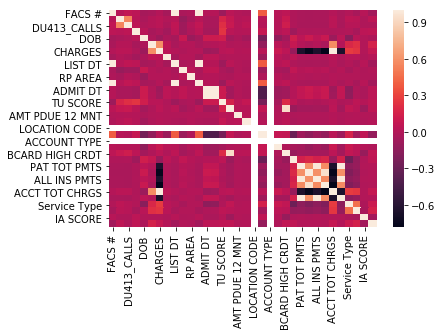

In [ ]:
sns.heatmap(corr)

In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data1.columns[columns]
data1 = data1[selected_columns]

In [ ]:
print(data1.dtypes)

FACS #             float64
CALLS              float64
DU413_CALLS        float64
ZIP5               float64
DOB                float64
INIT BAL           float64
CHARGES            float64
PT SEX             float64
PT AREA            float64
RP AREA            float64
ADMIT DT           float64
TU SCORE           float64
BNKCRD AVLBLE      float64
AMT PDUE 12 MNT    float64
NUM DEROGAT ITM    float64
LOCATION CODE      float64
F/C                float64
ACCOUNT TYPE       float64
DOD                float64
AGENCY CODE        float64
PAT TOT PMTS       float64
PAT TOT ADJS       float64
Service Type       float64
DRG CODE           float64
IA SCORE           float64
Payment Status     float64
dtype: object


In [ ]:
#X = data1.drop(columns=['Payment Status'])
#X_data = data1.drop(columns=['Payment Status'])
#y = data1['Payment Status']

In [ ]:
selected_columns = selected_columns[1:]
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(data1.iloc[:,1:].values, data1.iloc[:,0].values, SL, selected_columns)

In [ ]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)

In [ ]:
result = pd.DataFrame()
result['PaymentPrediction'] = data.iloc[:,-1]

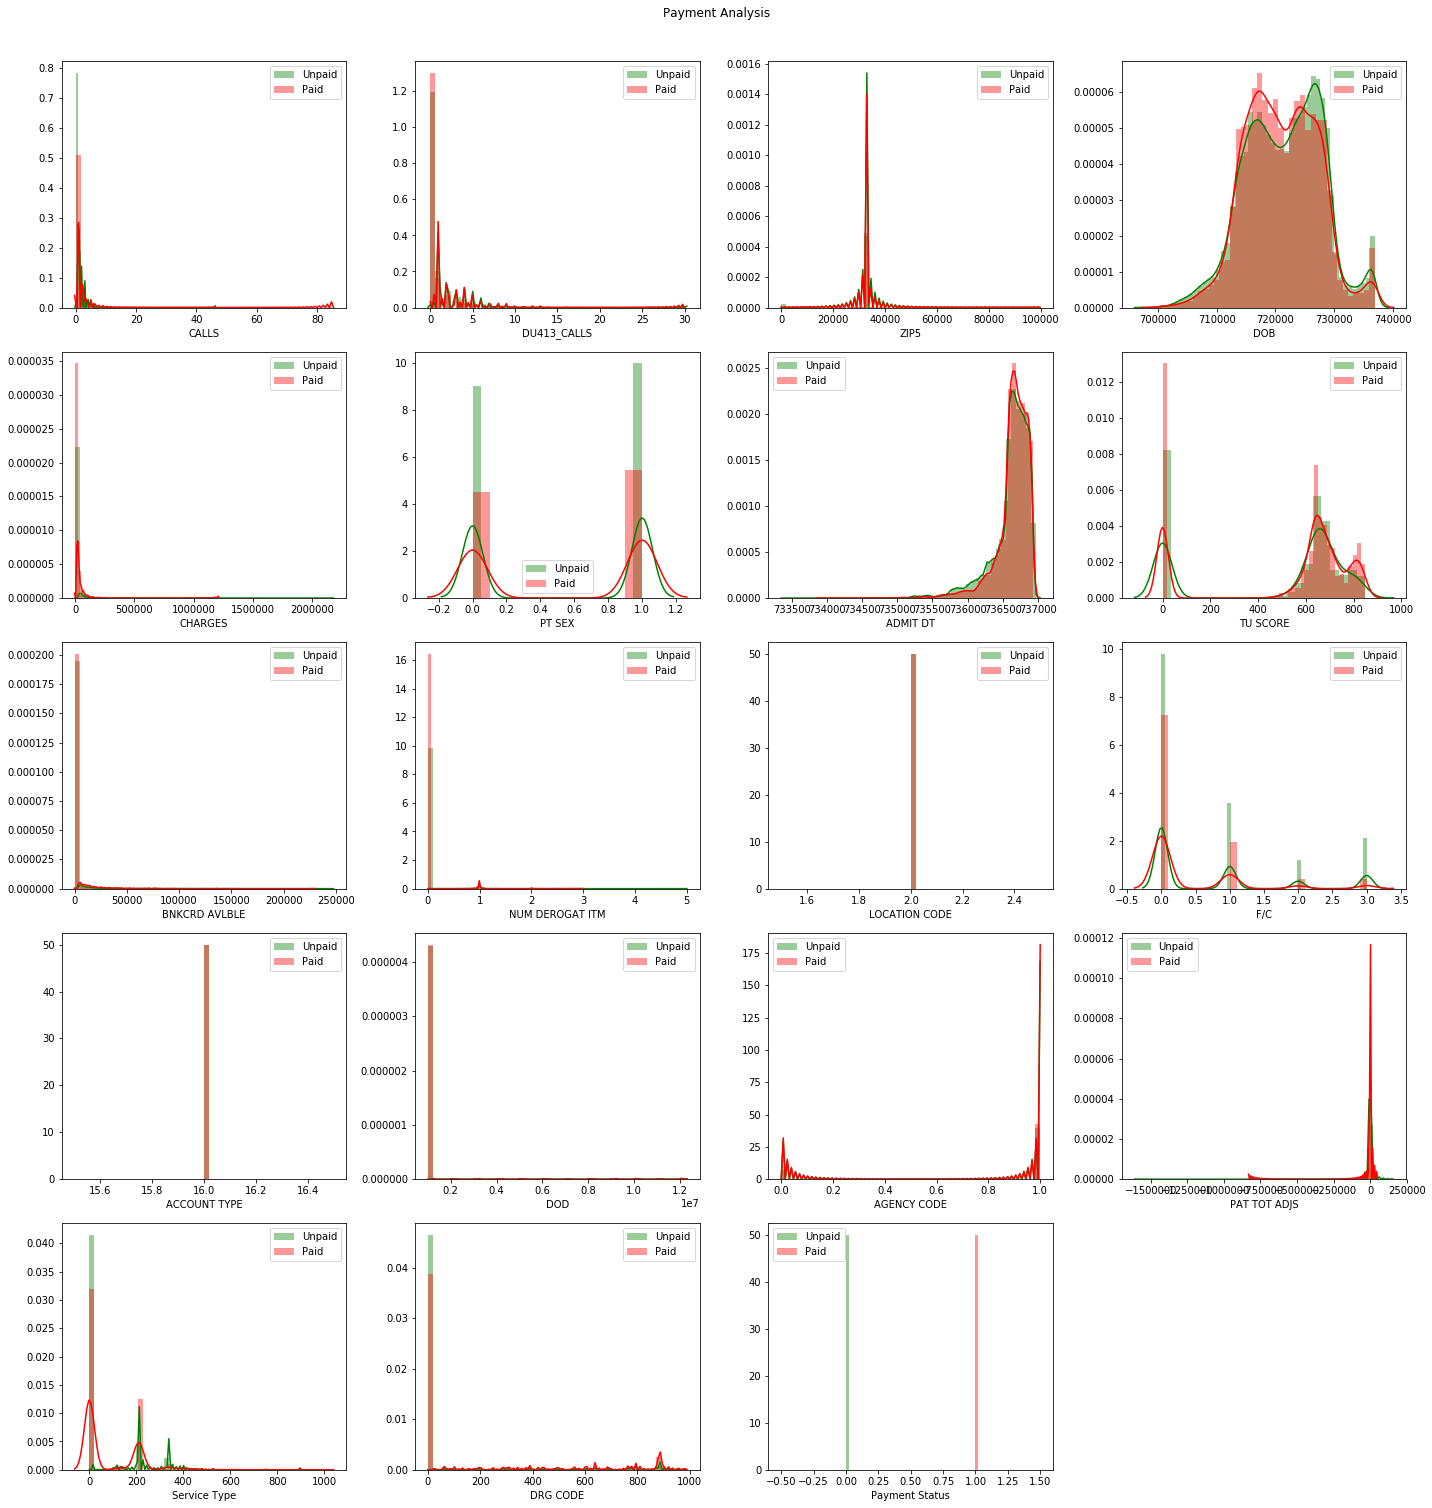

In [ ]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(data[i][result['PaymentPrediction']==0], color='g', label = 'Unpaid')
    sns.distplot(data[i][result['PaymentPrediction']==1], color='r', label = 'Paid')
    plt.legend(loc='best')
fig.suptitle('Payment Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.2)

In [ ]:
svc=SVC() # The default kernel used by SVC is the gaussian kernel
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [ ]:
prediction = svc.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]
print(accuracy)

0.8652886671418389


In [ ]:
print(cm)

[[9712    0]
 [1512    0]]


Text(0.5, 257.44, 'Predicted label')

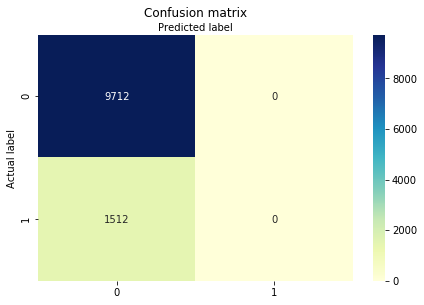

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(x_train.dtypes)

AttributeError: 'numpy.ndarray' object has no attribute 'dtypes'